# Salary Data analysis and Prediction

Dataset used : Salary Data

ML Model used : Linear Regression, Logistic Regression, KNN

In [ ]:
# Importing the liberaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
# Visualization settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
df = pd.read_csv("../Salary_Data.csv")

# Display basic info
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,6702.000000,6702,6701,6702,6701.000000,6699.000000
unique,NaN,3,7,193,NaN,NaN
top,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN
freq,NaN,3674,2267,518,NaN,NaN
mean,33.620859,NaN,NaN,NaN,8.094687,115326.964771
std,7.614633,NaN,NaN,NaN,6.059003,52786.183911
min,21.000000,NaN,NaN,NaN,0.000000,350.000000
25%,28.000000,NaN,NaN,NaN,3.000000,70000.000000
50%,32.000000,NaN,NaN,NaN,7.000000,115000.000000
75%,38.000000,NaN,NaN,NaN,12.000000,160000.000000


In [6]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [8]:
df.shape

(6698, 6)

In [9]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


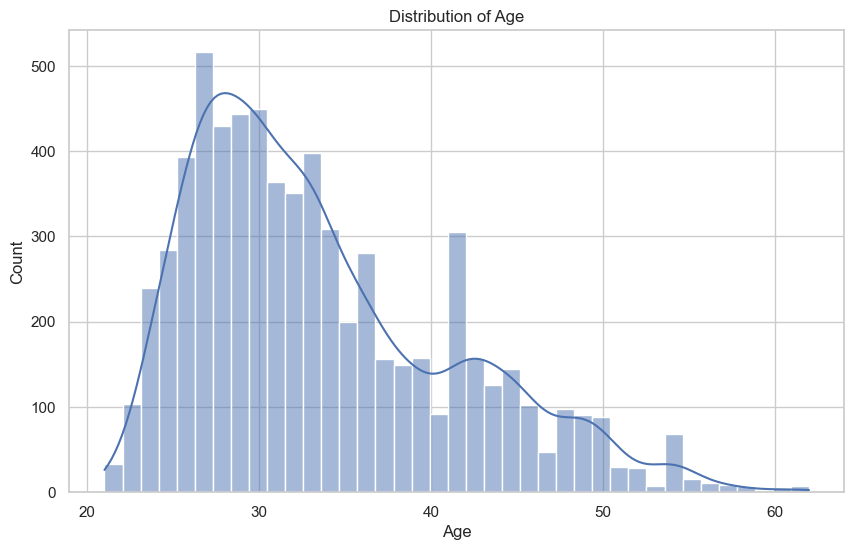

In [10]:
sns.histplot(df['Age'], kde=True)
plt.title(f"Distribution of Age")
plt.show()

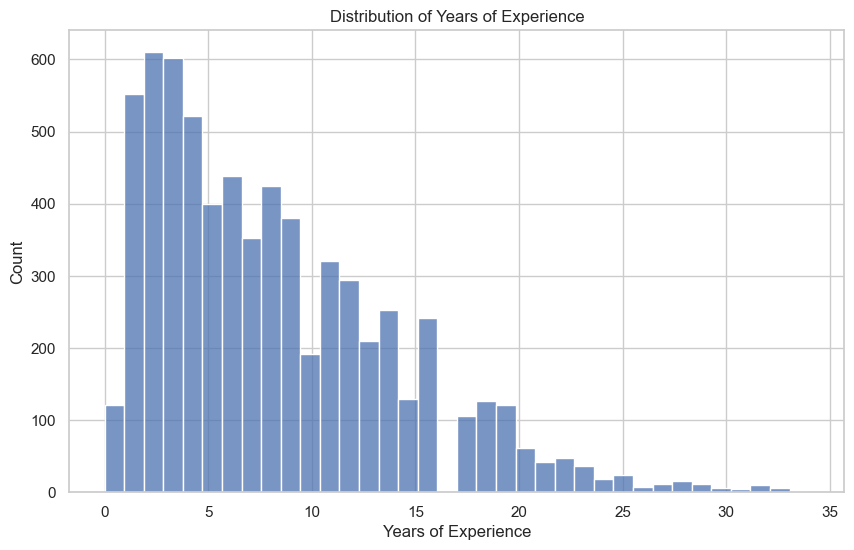

In [11]:
sns.histplot(df['Years of Experience'])
plt.title(f"Distribution of Years of Experience")
plt.show()

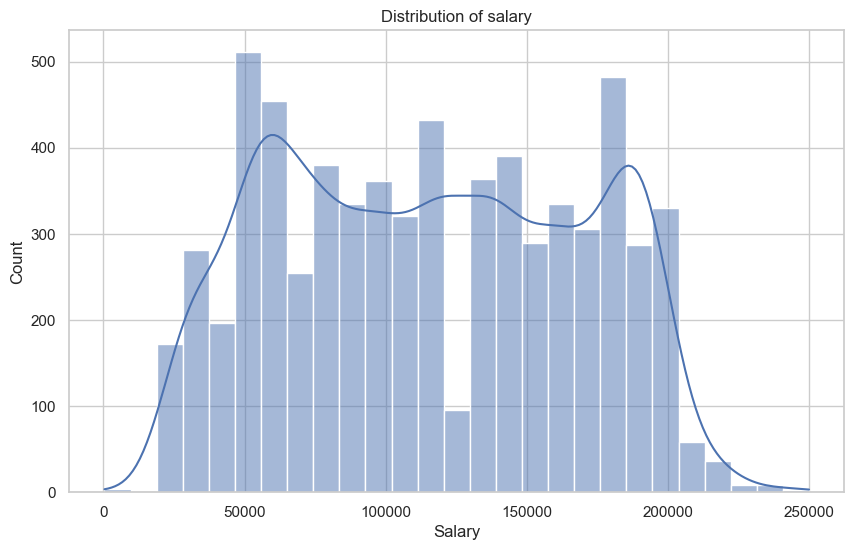

In [12]:
sns.histplot(df['Salary'], kde=True)
plt.title(f"Distribution of salary")
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_21020\2640901679.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Gender', data=df, palette='coolwarm')


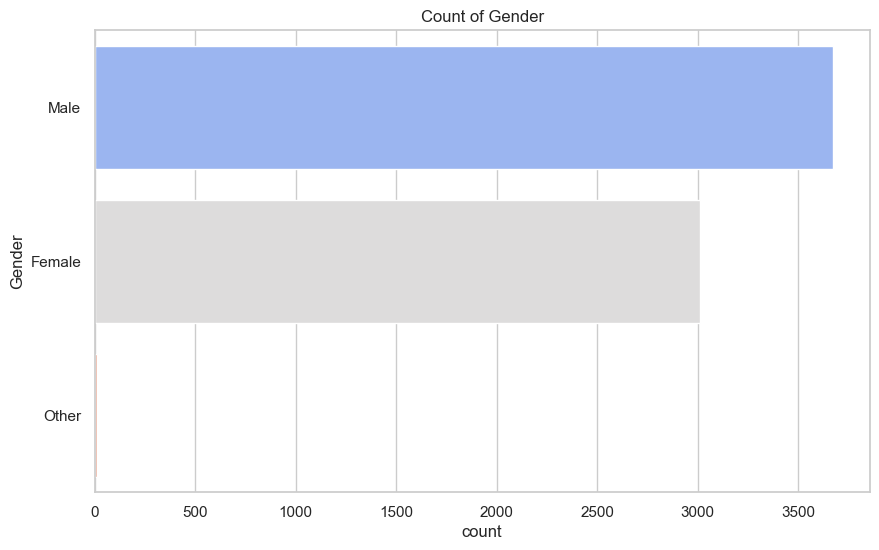

In [13]:
sns.countplot(y='Gender', data=df, palette='coolwarm')
plt.title(f"Count of Gender")
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_21020\381645373.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Education Level', data=df, palette='coolwarm')


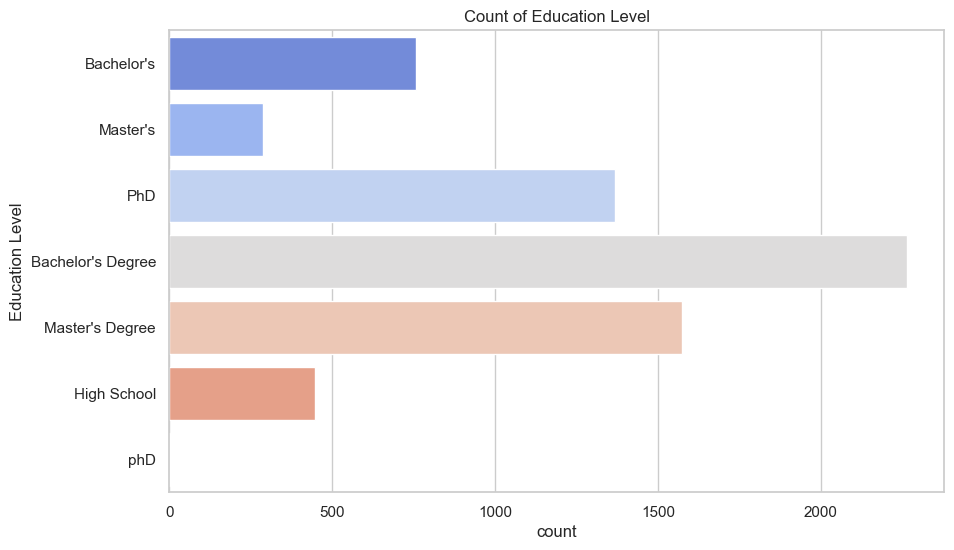

In [14]:
sns.countplot(y='Education Level', data=df, palette='coolwarm')
plt.title(f"Count of Education Level")
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_21020\4178527761.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Job Title', data=df, palette='coolwarm')


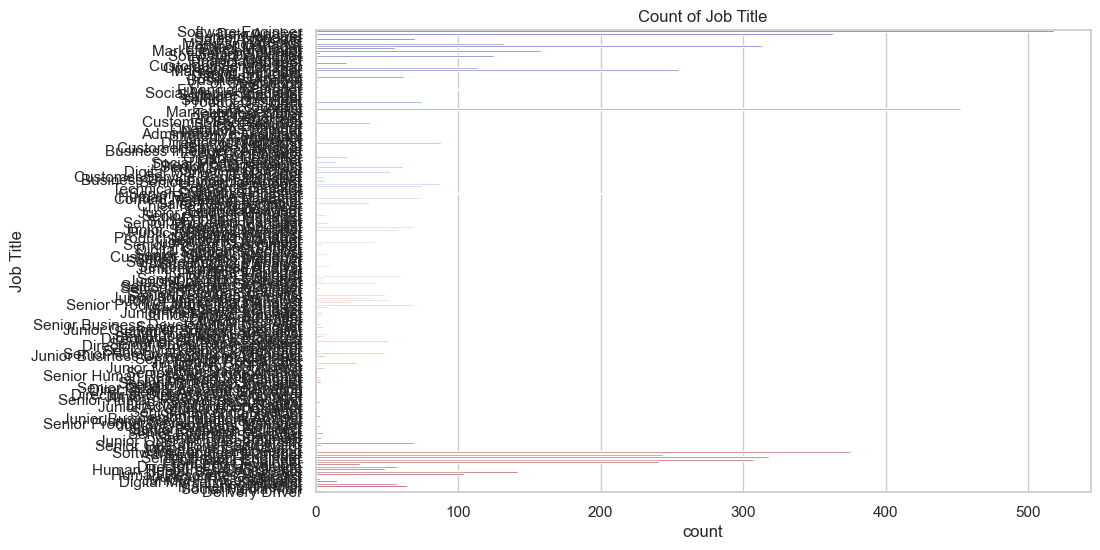

In [15]:
sns.countplot(y='Job Title', data=df, palette='coolwarm')
plt.title(f"Count of Job Title")
plt.show()

## 4. Bivariate Analysis

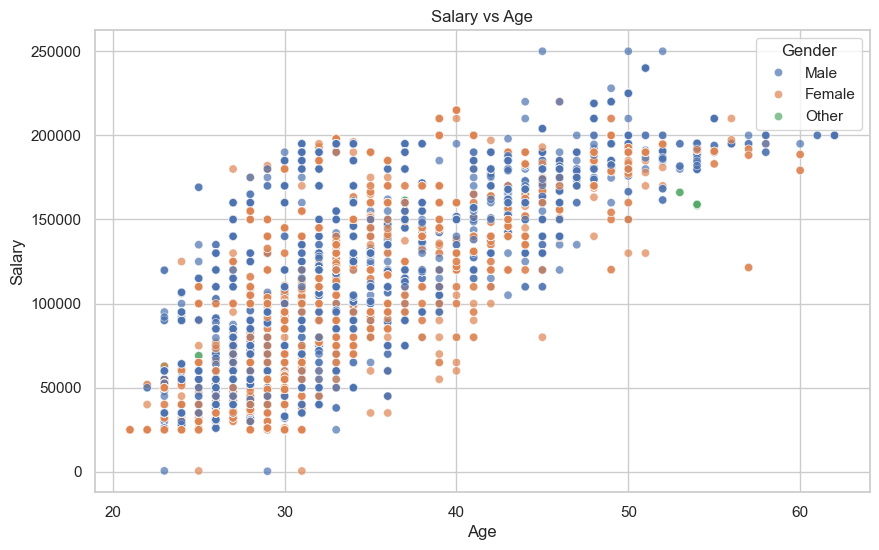

In [16]:
# Salary vs Age
sns.scatterplot(x='Age', y='Salary', data=df, hue='Gender', alpha=0.7)
plt.title("Salary vs Age")
plt.show()

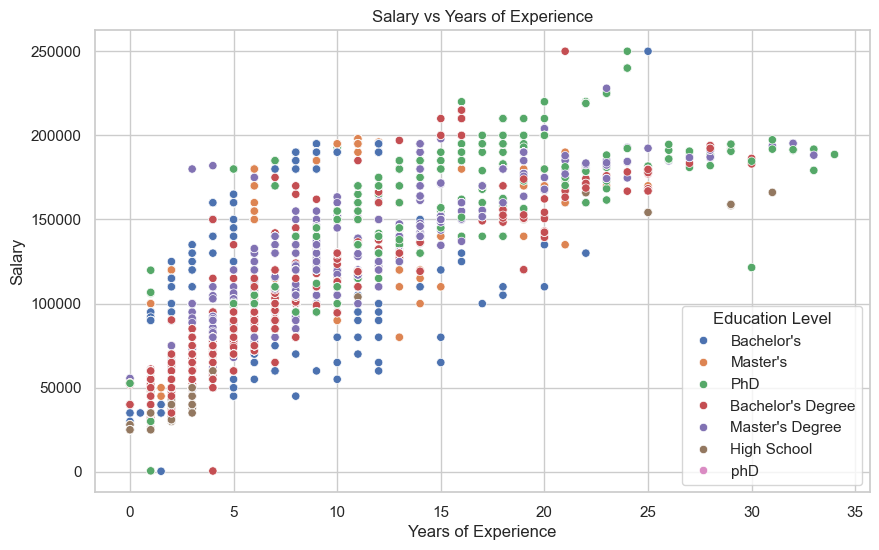

In [17]:
# Salary vs Experience
sns.scatterplot(x='Years of Experience', y='Salary', data=df, hue='Education Level')
plt.title("Salary vs Years of Experience")
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_21020\1875663293.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Education Level', y='Salary', data=df, estimator=np.mean, ci=None, palette='viridis')
C:\Users\shiva\AppData\Local\Temp\ipykernel_21020\1875663293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education Level', y='Salary', data=df, estimator=np.mean, ci=None, palette='viridis')


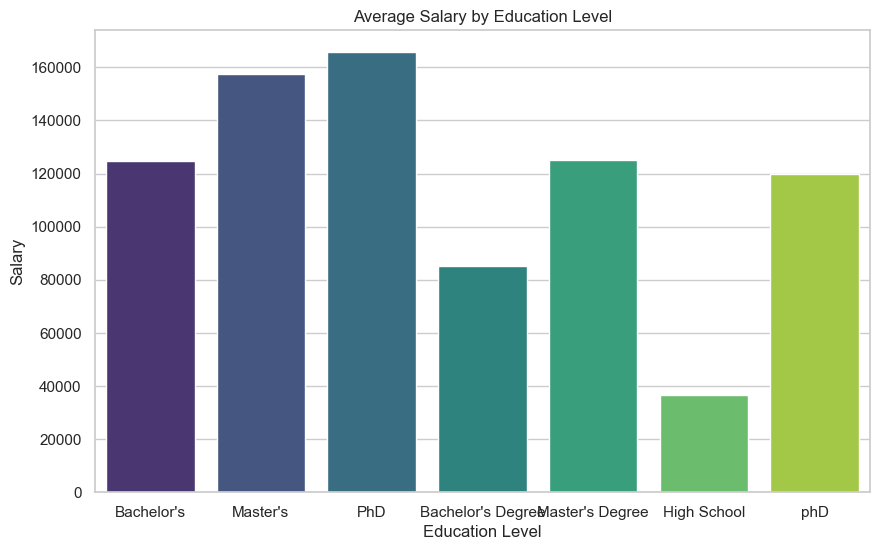

In [18]:
# Average salary by education
sns.barplot(x='Education Level', y='Salary', data=df, estimator=np.mean, ci=None, palette='viridis')
plt.title("Average Salary by Education Level")
plt.show()


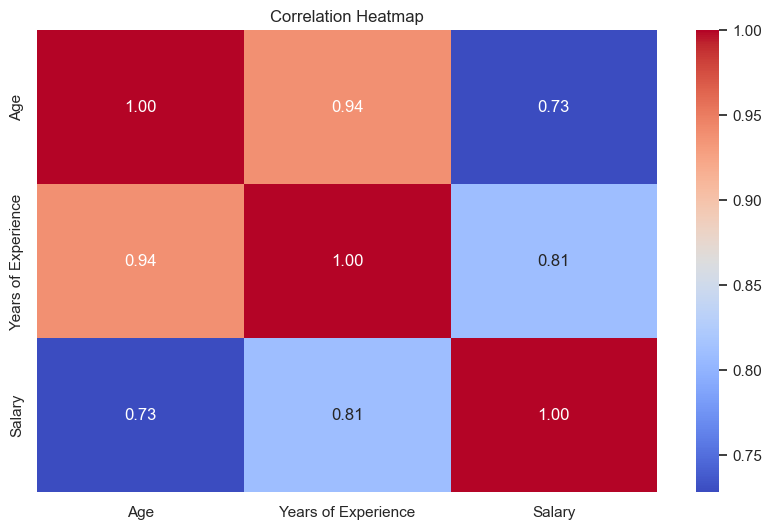

In [19]:
# co relation
corr = df[['Age', 'Years of Experience', 'Salary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [20]:
# lable encoding the data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])

In [21]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0,Master's,Data Analyst,3.0,65000.0
2,45.0,1,PhD,Senior Manager,15.0,150000.0
3,36.0,0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,1,Master's,Director,20.0,200000.0


In [22]:
df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [24]:
# converting text to numeric for the education level column
df.replace({'Education Level': {"Bachelor's Degree": 0,"Master's Degree": 1,"PhD": 2,"Bachelor's": 3,"High School" : 4,"Master's": 5,"phD": 6}}, inplace=True)
df.replace({'Job Title': {}})

C:\Users\shiva\AppData\Local\Temp\ipykernel_21020\2172176189.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Education Level': {"Bachelor's Degree": 0,"Master's Degree": 1,"PhD": 2,"Bachelor's": 3,"High School" : 4,"Master's": 5,"phD": 6}}, inplace=True)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,3,Software Engineer,5.0,90000.0
1,28.0,0,5,Data Analyst,3.0,65000.0
2,45.0,1,2,Senior Manager,15.0,150000.0
3,36.0,0,3,Sales Associate,7.0,60000.0
4,52.0,1,5,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,0,2,Director of Marketing,20.0,200000.0
6700,32.0,1,4,Sales Associate,3.0,50000.0
6701,30.0,0,0,Financial Manager,4.0,55000.0
6702,46.0,1,1,Marketing Manager,14.0,140000.0


In [25]:
# label encoding the Job Title column 
le = LabelEncoder()
le.fit(df['Job Title'])
df['Job Title'] = le.transform(df['Job Title'])

In [26]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,3,175,5.0,90000.0
1,28.0,0,5,18,3.0,65000.0
2,45.0,1,2,144,15.0,150000.0
3,36.0,0,3,115,7.0,60000.0
4,52.0,1,5,25,20.0,200000.0


linear regression
KNN
Logistic Regression

In [27]:
df.isnull().sum()
df.dropna(axis=1, inplace=True)
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [28]:
# Seperating the data into feature and target
X = df.drop(['Salary'], axis=1)
y = df['Salary']
print(X.shape,y.shape)

(6698, 5) (6698,)


In [29]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=442)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(5358, 5)
(5358,)
(1340, 5)
(1340,)


# Linear Regression

In [30]:
# training the model on the salary data with linear regression 

lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
train_pred = lr.predict(X_train)
train_pred


array([ 95228.94298081,  55820.3558422 , 109497.86406436, ...,
        54195.10867958,  66801.06757381,  86838.61583761], shape=(5358,))

In [32]:
# finding the accuracy of the model
error_score = r2_score(y_train,train_pred)
print("The R2 score is: ",error_score)

The R2 score is:  0.691331477906798


In [33]:
test_pred = lr.predict(X_test)
print(test_pred)

[ 52542.49027324 185166.19470974 103404.09345929 ...  83135.63136368
 167783.63551957  78102.79558663]


In [39]:
print("Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test, test_pred))
print("R2 Score:", r2_score(y_test, test_pred))

Linear Regression Performance:
MSE: 976538620.5881133
R2 Score: 0.6541404538928266


# Logistic Regression

In [35]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [37]:
y_pred_log = log_reg.predict(X_test)
y_pred_log

array([ 55000., 170000., 160000., ...,  80000., 140000.,  90000.],
      shape=(1340,))

In [41]:
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.19552238805970149

Confusion Matrix:
 [[24  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  2  0]]


# KNN = KNeighborsClassifier

In [42]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [43]:
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

[ 48000. 152168. 155000. ...  80000. 150000.  50000.]


In [44]:
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Performance:
Accuracy: 0.7156716417910448
